In [1]:
#import cac thu vien can thiet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist



In [2]:
#tao data 
np.random.seed(12)
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
#noi cac diem du lieu vao 1 ma tran X
X = np.concatenate((X0, X1, X2), axis = 0)
K = 3 # so cluster
print(X)

origin_label= np.asarray([0]*N+[1]*N+[2]*N).T



[[2.47298583 1.31857412]
 [2.2424395  0.29926437]
 [2.75314283 0.46527866]
 ...
 [2.94461745 5.65718925]
 [1.89585968 5.5555885 ]
 [1.20291801 6.62742213]]


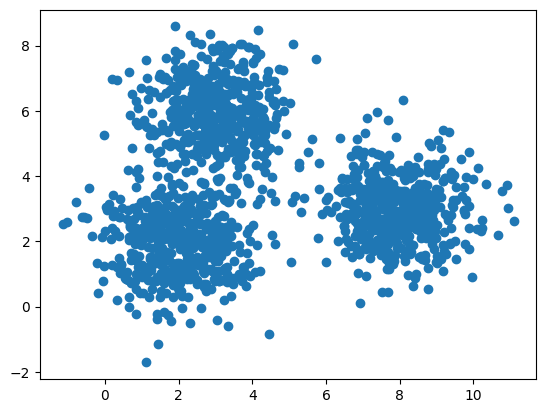

In [3]:
# hien thi do thi data

plt.plot(X[:,0],X[:,1],'o')
#plt.plot()
plt.show()


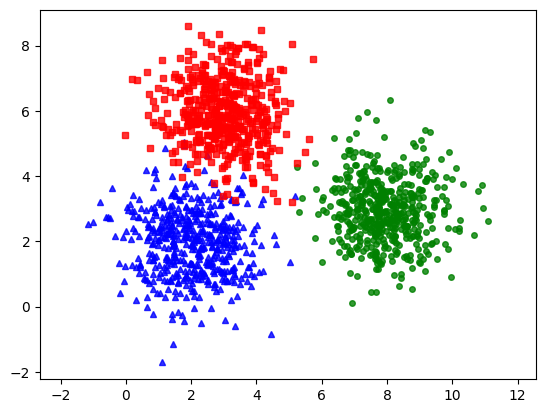

In [4]:
#dinh nghia ham hien thi 
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()
kmeans_display(X,origin_label)

In [4]:
#ham khoi tao cac tam 
def k_mean_init_center(X , k):
    #chon ngau nhien k phan tu de lam center bat dau
    return X[np.random.choice(X.shape[0],k,replace=False)]

#ham gan nhan khi co center moi
def k_mean_assign_label(X , center):
    # khoang cach giua cac diem va center:
    D = cdist(X,center)
    
    return np.argmin(D,axis=1)

#ham update center dua vao label cac diem moi
def k_mean_update_center(X , label, K):
    center = np.zeros((K,X.shape[1]))
    for k in range(K):
        #lay du lieu cac diem thuoc label k
        X_k=X[label==k,:]
        center[k,:]=np.mean(X_k, axis=0)
    return center

# ham check xem cac center co thay doi sau khong
def check(old_center,new_center):
    return (set([tuple(a) for a in old_center]) == set([tuple(a) for a in new_center]))
    
    


    

In [5]:
center = k_mean_init_center(X,K)
max_iterator=100
label = origin_label
for i in range(max_iterator):
    print("dang chay lan thu",i)
    label = k_mean_assign_label(X,center)
    new_center=k_mean_update_center(X,label, K)
    if(check(center,new_center)):
        break
    else:
        center=new_center


dang chay lan thu 0
dang chay lan thu 1
dang chay lan thu 2
dang chay lan thu 3
dang chay lan thu 4
dang chay lan thu 5
dang chay lan thu 6


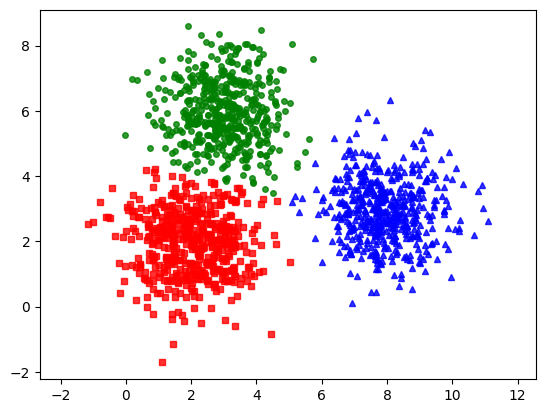

In [6]:
#hien thi sau khi cluster
kmeans_display(X, label)